In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline
# code to regulate the size of plots for the rest of notebook
plt.rc('figure', figsize=(14, 12))
plt.rc('font', size=13)

In [2]:
colnames=['timestamp', 'time', 'destination', 'user', 'cohort',
          'ip', 'huh']
df = pd.read_csv('curriculum-access.txt',          
                 engine='python',
                 header=None,
                 index_col=False,
                 names=colnames,
                 error_bad_lines=False,
                 sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                 na_values='"-"')

In [3]:
df['Timestamp'] = df['timestamp'] + " " + df['time']
df = df.drop(columns = ['timestamp', 'time', 'huh'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values("Timestamp").set_index('Timestamp')
df.head()


,destination,user,cohort,ip
Timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,98.106.20.62
2018-01-26 09:56:02,java-ii,1,8.0,98.106.20.62
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [4]:
# def get_topic(destination):
#     ds_list = [python, time series, nlp]
#     web_dev = [javascript, java, css]
#     for ds in ds_list:
#         if ds in destination:
#             return “Data Science”
#     for wd in web_dev:
#         if wd in destination:
#             return “Web Dev”
#     return “Unknown”
# curie[“course”] = df.destination.apply(get_topic)

In [5]:
# function that takes in a url topic and returns a course name
def get_course(destination):
    if type(destination) != str:
        return "Unknown"
    # Recommend using boolean flag variables to simplify
    exists_in_web_dev = False
    exists_in_ds = False
    wd = ['javascript', 'java', 'css', 'mysql', 'jquery', 'spring', 'html', 'object_oriented_programming']
    ds = ['anomaly', 'timeseries', 'python', 'mysql', 'regression', 'classification', 'stats', 'tidy']
    for w in wd:
        if w in destination:
            exists_in_web_dev = True
    for d in ds:
        if d in destination:
            exists_in_ds = True
    if exists_in_ds and exists_in_web_dev:
        answer = "Both"
    elif exists_in_ds:
        answer = "Data Science"
    elif exists_in_web_dev:
        answer = "Web Dev"
    else:
        answer = "Unknown"
    return answer

In [6]:
curie = df.loc['2020-02-03':'2020-05']
curie.cohort.value_counts()

53.0    25533
56.0    14438
55.0    14252
28.0    12712
52.0    11709
57.0     9547
51.0     3729
34.0     2005
33.0     1560
31.0     1293
32.0      407
26.0      407
29.0      245
17.0      211
21.0      165
24.0      122
25.0       99
23.0       78
22.0       48
27.0       41
8.0        41
14.0       20
13.0       16
18.0        6
19.0        5
1.0         5
16.0        3
5.0         1
Name: cohort, dtype: int64

In [7]:
curie['program'] = curie.destination.apply(get_course)

In [8]:
curie.head()

,destination,user,cohort,ip,program
Timestamp,,,,,
2020-02-03 06:36:01,/,568,53.0,98.106.20.59,Unknown
2020-02-03 06:39:17,html-css,568,53.0,98.106.20.59,Web Dev
2020-02-03 06:39:21,html-css/css-ii/bootstrap-grid-system,568,53.0,98.106.20.59,Web Dev
2020-02-03 07:44:40,mysql/extra-exercises,515,33.0,68.12.216.98,Both
2020-02-03 07:49:05,java-ii/arrays,531,52.0,69.207.166.119,Web Dev


(array([146.,  64.,  27.,  16.,   7.,   2.,   1.,   2.,   1.,   1.]),
 array([1.0000e+00, 2.9940e+02, 5.9780e+02, 8.9620e+02, 1.1946e+03,
        1.4930e+03, 1.7914e+03, 2.0898e+03, 2.3882e+03, 2.6866e+03,
        2.9850e+03]),
 <a list of 10 Patch objects>)

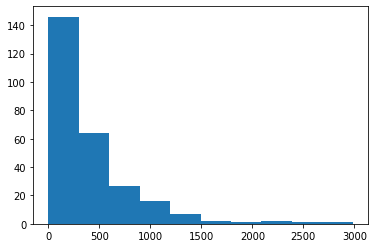

In [17]:
plt.hist(curie.groupby('cohort')['user'].value_counts())